# 1. Exploración de datos (EDA)


In [4]:
# Subir archivo CSV desde tu PC
from google.colab import files
uploaded = files.upload()  # Aparecerá un botón para elegir el archivo

import pandas as pd
import numpy as np

# Nombre exacto del archivo que subas (ajústalo si el nombre es distinto)
DATA_PATH = "gameandgrade new.csv"

# Cargar el dataset
df = pd.read_csv(DATA_PATH)

print('Shape del dataset:', df.shape)
display(df.head(10))

print('\nInformación general:')
display(df.info())

print('\nDescripción numérica y categórica:')
display(df.describe(include='all').transpose())

print('\nValores nulos por columna:')
display(df.isnull().sum())

# Mostrar distribución de Grade
if 'Grade' in df.columns:
    print('\nDistribución original de Grade:')
    display(df['Grade'].value_counts(dropna=False))
else:
    raise ValueError('La columna "Grade" no existe en el dataset.')


Saving gameandgrade new.csv to gameandgrade new (1).csv
Shape del dataset: (770, 11)


,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade,percentage
0,0,1,1,2,1,1,4,4,5,77.50,"7750,00%"
1,1,1,1,3,1,1,1,3,3,83.00,"8300,00%"
2,0,1,0,0,0,0,1,3,3,80.00,"8000,00%"
3,0,1,3,5,1,1,2,2,3,45.00,"4500,00%"
4,1,1,1,1,2,1,1,3,4,85.00,"8500,00%"
5,0,1,1,5,1,1,1,2,2,80.00,"8000,00%"
6,0,1,1,2,2,1,2,3,3,55.00,"5500,00%"
7,0,1,1,5,2,1,2,3,3,80.00,"8000,00%"
8,1,1,2,1,1,1,3,3,5,60.00,"6000,00%"
9,0,1,2,5,2,1,1,2,4,88.00,"8800,00%"



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sex               770 non-null    int64 
 1   School Code       770 non-null    int64 
 2   Playing Years     770 non-null    int64 
 3   Playing Often     770 non-null    int64 
 4   Playing Hours     770 non-null    int64 
 5   Playing Games     770 non-null    int64 
 6   Parent Revenue    770 non-null    int64 
 7   Father Education  770 non-null    int64 
 8   Mother Education  770 non-null    int64 
 9   Grade             770 non-null    object
 10  percentage        770 non-null    object
dtypes: int64(9), object(2)
memory usage: 66.3+ KB


None


Descripción numérica y categórica:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sex,770.0,NaN,NaN,NaN,0.498701,0.500323,0.0,0.0,0.0,1.0,1.0
School Code,770.0,NaN,NaN,NaN,4.944156,2.999913,1.0,2.0,4.0,8.0,11.0
Playing Years,770.0,NaN,NaN,NaN,1.584416,1.407306,0.0,0.0,1.0,3.0,4.0
Playing Often,770.0,NaN,NaN,NaN,2.242857,1.923635,0.0,0.0,2.0,4.0,5.0
Playing Hours,770.0,NaN,NaN,NaN,1.488312,1.337853,0.0,0.0,1.0,2.0,5.0
Playing Games,770.0,NaN,NaN,NaN,0.706494,0.458509,0.0,0.0,1.0,1.0,2.0
Parent Revenue,770.0,NaN,NaN,NaN,1.837662,1.064077,0.0,1.0,2.0,2.0,4.0
Father Education,770.0,NaN,NaN,NaN,3.718182,1.171756,0.0,3.0,4.0,5.0,6.0
Mother Education,770.0,NaN,NaN,NaN,3.41039,1.176447,0.0,2.25,3.0,4.0,6.0
Grade,770,105,100,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Valores nulos por columna:


,0
Sex,0
School Code,0
Playing Years,0
Playing Often,0
Playing Hours,0
Playing Games,0
Parent Revenue,0
Father Education,0
Mother Education,0
Grade,0



Distribución original de Grade:


,count
Grade,
100,104
70.00,61
80.00,51
90.00,51
75.00,50
...,...
82.20,1
81.00,1
55.30,1


# 2. Etiquetado de datos


In [12]:
# === Etiquetado: 3 categorías (bajo/medio/alto) desde 'percentage' o 'Grade' ===
import numpy as np
import pandas as pd

df2 = df.copy()

# Intentar crear un porcentaje numérico
perc = None
if 'percentage' in df2.columns:
    perc = pd.to_numeric(
        df2['percentage'].astype(str).str.replace('%', '', regex=False),
        errors='coerce'
    )
# Si no hay 'percentage', intentar con Grade si es numérica
if perc is None or perc.isna().all():
    perc = pd.to_numeric(df2['Grade'], errors='coerce')

# Si aún así no hay nada usable, abortar con mensaje claro
if perc.isna().all():
    raise ValueError("No se pudo derivar un porcentaje numérico desde 'percentage' ni 'Grade'.")

# Binning en 3 clases (puedes ajustar umbrales a tu criterio)
bins = [-np.inf, 59.9, 79.9, np.inf]
labels = ['bajo', 'medio', 'alto']
df2['Grade_cat'] = pd.cut(perc, bins=bins, labels=labels)

# Eliminar filas sin categoría (por NaNs)
df2 = df2.dropna(subset=['Grade_cat']).copy()

# Mapear a enteros ordenados
label_order = ['bajo', 'medio', 'alto']
mapping = {l:i for i, l in enumerate(label_order)}
df2['Grade_label'] = df2['Grade_cat'].map(mapping)

print("Mapping Grade_cat -> int:", mapping)
print("\nConteo por clase:")
display(df2['Grade_label'].value_counts())


Mapping Grade_cat -> int: {'bajo': 0, 'medio': 1, 'alto': 2}

Conteo por clase:


,count
Grade_label,
2,391
1,266
0,112


# 3. Arquitectura de datos y preprocesamiento


In [14]:
# Preprocesamiento y split (robusto a versión de sklearn y sin categóricas)
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import inspect

assert 'Grade_label' in df2.columns, "Ejecuta primero la celda de etiquetado."

# Usaremos todas las columnas excepto las de target/auxiliares
drop_cols = [c for c in ['Grade', 'percentage', 'Grade_cat', 'Grade_label'] if c in df2.columns]
X = df2.drop(columns=drop_cols)
y = df2['Grade_label']

# Detectar columnas
numeric_cols = X.select_dtypes(include=['int64','float64','int32','float32']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()

print('Columnas numéricas:', numeric_cols)
print('Columnas categóricas:', cat_cols)

# Pipelines numérico y (opcional) categórico
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Crear OneHotEncoder con el nombre de parámetro correcto según la versión
if cat_cols:
    if 'sparse_output' in inspect.signature(OneHotEncoder).parameters:
        ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    else:
        ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
        ('onehot', ohe)
    ])

# Armar ColumnTransformer dinámicamente
transformers = [('num', numeric_transformer, numeric_cols)]
if cat_cols:
    transformers.append(('cat', categorical_transformer, cat_cols))

preprocessor = ColumnTransformer(transformers=transformers)

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Columnas numéricas: ['Sex', 'School Code', 'Playing Years', 'Playing Often', 'Playing Hours', 'Playing Games', 'Parent Revenue', 'Father Education', 'Mother Education']
Columnas categóricas: []
Train shape: (615, 9) Test shape: (154, 9)


# 4. Aumento de datos (SMOTE) — justificación y aplicación


In [15]:
# SMOTE con vecinos adaptativos según la clase minoritaria

from collections import Counter

print('Distribución original (train):', Counter(y_train))

use_smote = True
try:
    from imblearn.over_sampling import SMOTE
except Exception as e:
    print('imblearn no disponible:', e)
    use_smote = False

X_train_proc = preprocessor.fit_transform(X_train)

if use_smote:
    # k_neighbors no puede ser >= al tamaño de la clase minoritaria
    min_count = y_train.value_counts().min()
    k = max(1, min(5, int(min_count) - 1))  # entre 1 y 5
    try:
        sm = SMOTE(random_state=42, k_neighbors=k)
        X_res, y_res = sm.fit_resample(X_train_proc, y_train)
        print('SMOTE aplicado (k_neighbors=', k, '). Nueva distr.:', Counter(y_res))
        augmented_method = 'smote'
    except Exception as e:
        print('SMOTE falló:', e)
        use_smote = False

if not use_smote:
    # Fallback: ruido en numéricas
    import numpy as np
    if len(numeric_cols) > 0:
        X_num = X_train[numeric_cols].values
        n_aug = int(0.2 * X_num.shape[0])
        noise = np.random.normal(0, X_num.std(axis=0, ddof=0)*0.01, size=(n_aug, X_num.shape[1]))
        X_aug_num = X_num[:n_aug] + noise
        if cat_cols:
            X_cat = X_train[cat_cols].iloc[:n_aug].values
            X_aug = np.hstack([X_aug_num, X_cat])
        else:
            X_aug = X_aug_num
        y_aug = y_train.iloc[:n_aug].values
        print('Aumento por ruido creado. Tamaño:', X_aug.shape)
        augmented_method = 'noise'
    else:
        print('No hay columnas numéricas para aumentar.')
        augmented_method = 'none'

Distribución original (train): Counter({2: 313, 1: 213, 0: 89})
SMOTE aplicado (k_neighbors= 5 ). Nueva distr.: Counter({2: 313, 1: 313, 0: 313})


# 5.Validación cruzada

In [16]:
# Validación cruzada y comparación de modelos con n_splits robusto
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# n_splits no puede ser mayor que el tamaño de la clase minoritaria
min_count = y.value_counts().min()
n_splits = max(2, min(5, int(min_count)))  # entre 2 y 5
print('Usando StratifiedKFold con n_splits =', n_splits)
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'RandomForest': RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42, class_weight='balanced')
}

# Solo intentar XGBoost si hay clases suficientes
use_xgb = (y.nunique() <= 10) and (min_count >= n_splits)
if use_xgb:
    try:
        import xgboost as xgb
        models['XGBoost'] = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    except Exception as e:
        print('XGBoost no disponible:', e)

results = {}
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    scores = cross_val_score(pipe, X, y, cv=skf, scoring='f1_macro', n_jobs=1)
    results[name] = scores
    print(f'{name}: F1_macro mean={scores.mean():.4f}, std={scores.std():.4f}')

best_model_name = max(results, key=lambda k: results[k].mean())
print('\\nMejor modelo según F1_macro:', best_model_name)
best_model = models[best_model_name]
best_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])

best_pipe.fit(X_train, y_train)
y_pred = best_pipe.predict(X_test)
print('\\nMétricas en test:')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\\nClassification report:\\n', classification_report(y_test, y_pred))
print('\\nConfusion Matrix:\\n', confusion_matrix(y_test, y_pred))

Usando StratifiedKFold con n_splits = 5
LogisticRegression: F1_macro mean=0.4308, std=0.0344
RandomForest: F1_macro mean=0.4924, std=0.0208


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:40:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:40:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:40:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:40:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:40:25] WARNING: /w

XGBoost: F1_macro mean=0.4913, std=0.0247
\nMejor modelo según F1_macro: RandomForest
\nMétricas en test:
Accuracy: 0.525974025974026
\nClassification report:\n               precision    recall  f1-score   support

           0       0.38      0.26      0.31        23
           1       0.42      0.55      0.48        53
           2       0.67      0.59      0.63        78

    accuracy                           0.53       154
   macro avg       0.49      0.47      0.47       154
weighted avg       0.54      0.53      0.53       154

\nConfusion Matrix:\n [[ 6 11  6]
 [ 7 29 17]
 [ 3 29 46]]


# 6. Overfitting y curvas de aprendizaje


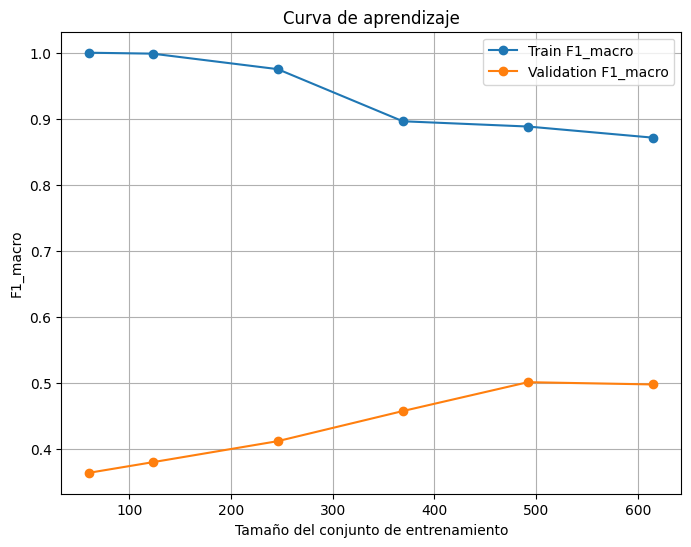

In [17]:
# Curva de aprendizaje
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

pipe = best_pipe
train_sizes, train_scores, valid_scores = learning_curve(pipe, X, y, cv=skf, scoring='f1_macro', train_sizes=[0.1,0.2,0.4,0.6,0.8,1.0], n_jobs=1)
train_mean = train_scores.mean(axis=1)
valid_mean = valid_scores.mean(axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', label='Train F1_macro')
plt.plot(train_sizes, valid_mean, 'o-', label='Validation F1_macro')
plt.title('Curva de aprendizaje')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('F1_macro')
plt.legend()
plt.grid(True)
plt.show()


# 7. Importancia de variables e interpretación



In [18]:
# Importancia de features (si aplica)
import numpy as np
if hasattr(best_model, 'feature_importances_'):
    # Obtener importancias del modelo entrenado
    fi = best_model.feature_importances_
    # Mostramos las 20 mayores (índices relativos al preprocessor transform)
    idx = np.argsort(fi)[::-1][:20]
    print('Top feature indices (post-preprocessor):', idx)
    print('Top feature importances:', fi[idx])
else:
    print('El modelo seleccionado no provee feature_importances_. Para interpretabilidad avanzada se recomienda SHAP.')


Top feature indices (post-preprocessor): [1 6 7 8 3 4 2 0 5]
Top feature importances: [0.21974995 0.18056203 0.13409639 0.13006082 0.09070778 0.08956425
 0.08584864 0.05460965 0.01480048]
